# Exploratory Data Analysis

In [15]:
import pandas as pd

In [17]:
df = pd.read_parquet("datasets/diabetes_non_outliers.parquet")

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.000000,3.000000,6.00000,17.00
Glucose,768.0,121.690337,30.440223,44.000,99.750000,117.000000,140.25000,199.00
BloodPressure,768.0,72.372535,12.143375,24.000,64.000000,72.000000,80.00000,122.00
SkinThickness,768.0,28.864304,9.369033,7.000,22.232143,28.732143,35.00000,99.00
Insulin,768.0,151.562826,93.117689,14.000,92.000000,135.000000,182.00000,846.00
BMI,768.0,32.446573,6.878629,18.200,27.500000,32.050000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.243750,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.000000,29.000000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.000000,0.000000,1.00000,1.00


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


## Seperating Columns for Types

In [20]:
from feature_utils import get_columns_type

2023-03-12 04:10:03,766 - logging_utils - DEBUG - get_columns_type executing...
2023-03-12 04:10:03,769 - logging_utils - INFO - 
Numeric Columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Categoric Columns: ['Outcome']
Cardinal Columns: []


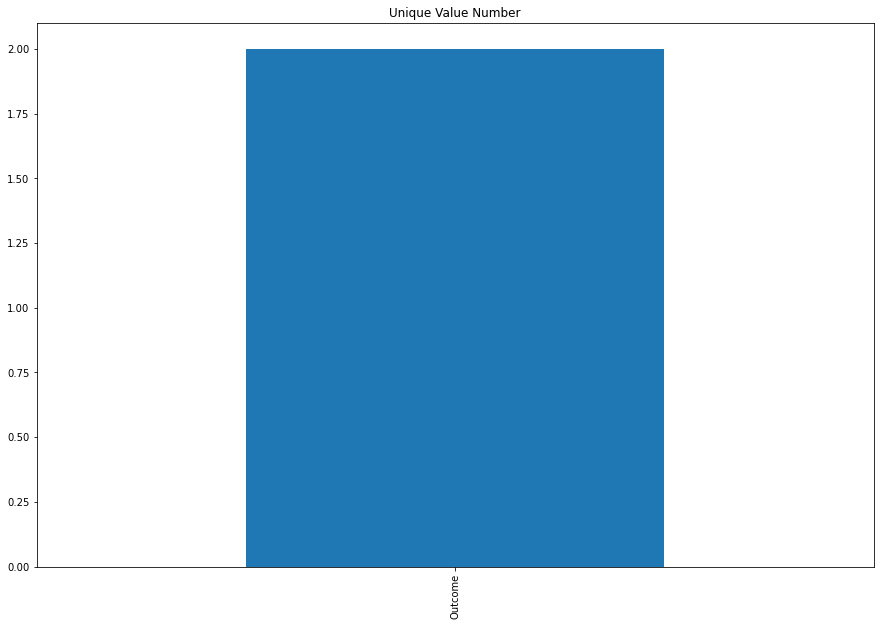

In [21]:
numeric_cols, categoric_cols, cardinal_cols = get_columns_type(df, plot=1)

For the categoric column, there is only one column which is **Outcome**. Outcome column is the target column therefore it would have non categoric and non cardinal columns. However lets analyze the Outcome column.
## Analyze the Target Column

In [22]:
from feature_utils import describe_categoric

2023-03-12 04:10:05,748 - logging_utils - DEBUG - describe_categoric executing...
2023-03-12 04:10:05,751 - logging_utils - INFO - 
0    500
1    268
Name: Outcome, dtype: int64


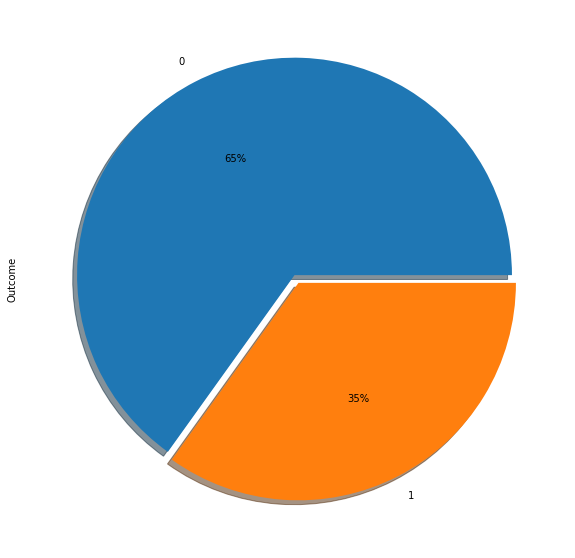

In [23]:
describe_categoric(df, columns=categoric_cols)

For the analysis, people are not mostly diabetes sick.
## Analyze The Numeric Columns for Target Column

In [24]:
from feature_utils import describe_for_target

2023-03-12 04:10:07,557 - logging_utils - DEBUG - describe_for_target executing...
2023-03-12 04:10:07,565 - logging_utils - INFO - 
        Pregnancies                 
               mean median       std
Outcome                             
0          3.298000    2.0  3.017185
1          4.865672    4.0  3.741239
2023-03-12 04:10:07,606 - logging_utils - INFO - 
            Glucose                  
               mean median        std
Outcome                              
0        110.698214  107.5  24.718300
1        142.198028  140.0  29.521568
2023-03-12 04:10:07,644 - logging_utils - INFO - 
        BloodPressure                      
                 mean     median        std
Outcome                                    
0           70.793143  70.000000  11.954849
1           75.319163  75.232143  11.963200
2023-03-12 04:10:07,687 - logging_utils - INFO - 
        SkinThickness                     
                 mean     median       std
Outcome                             

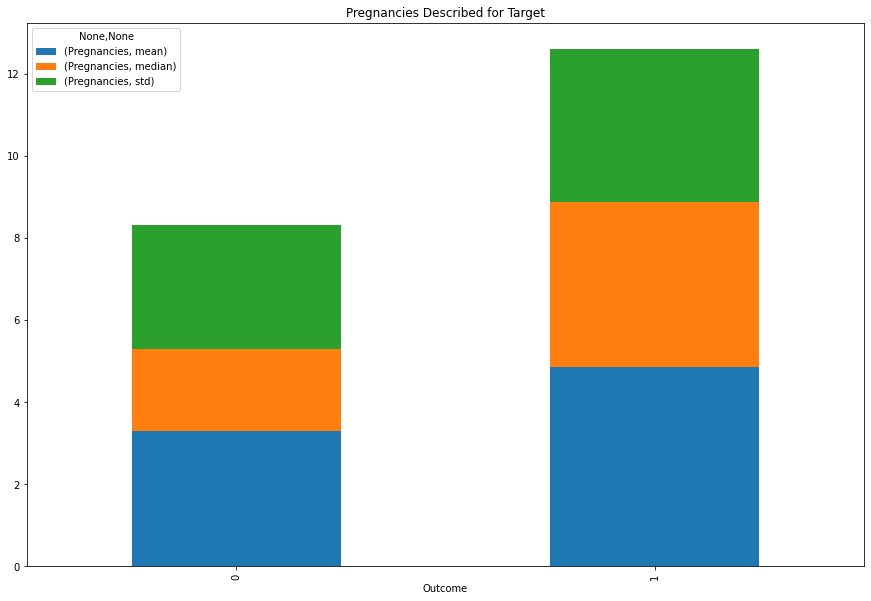

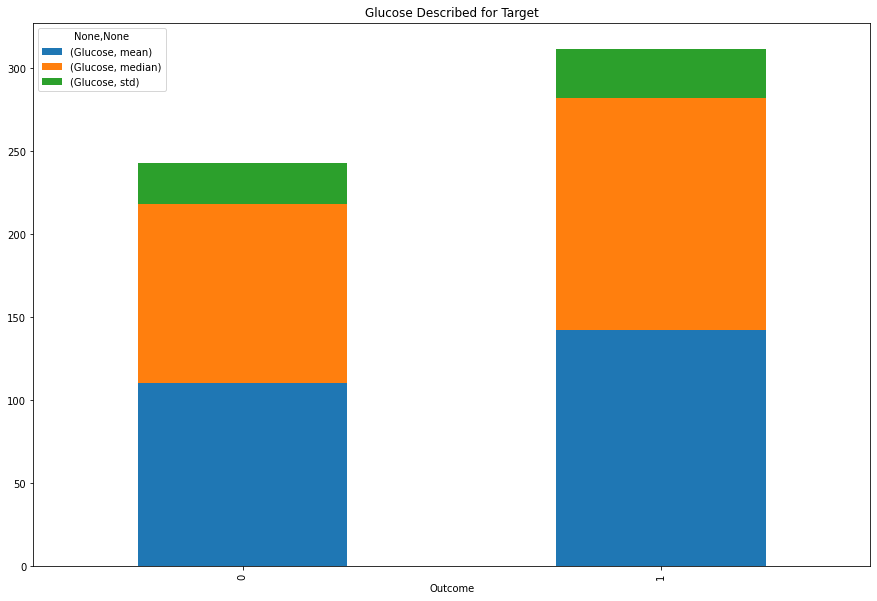

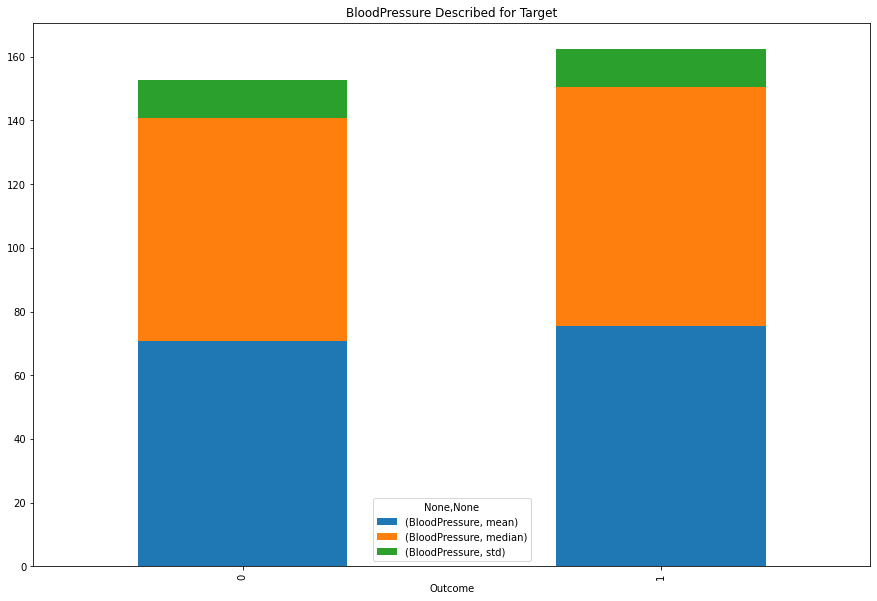

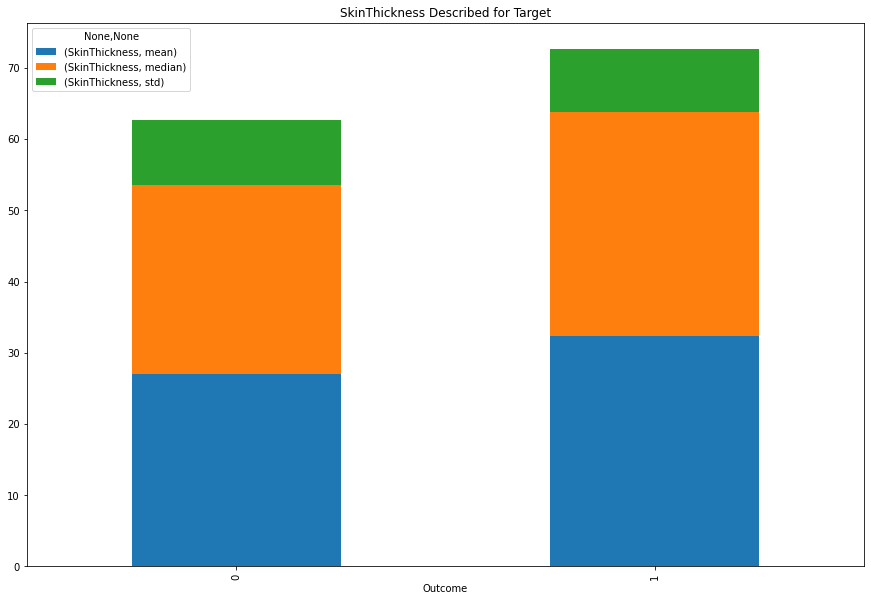

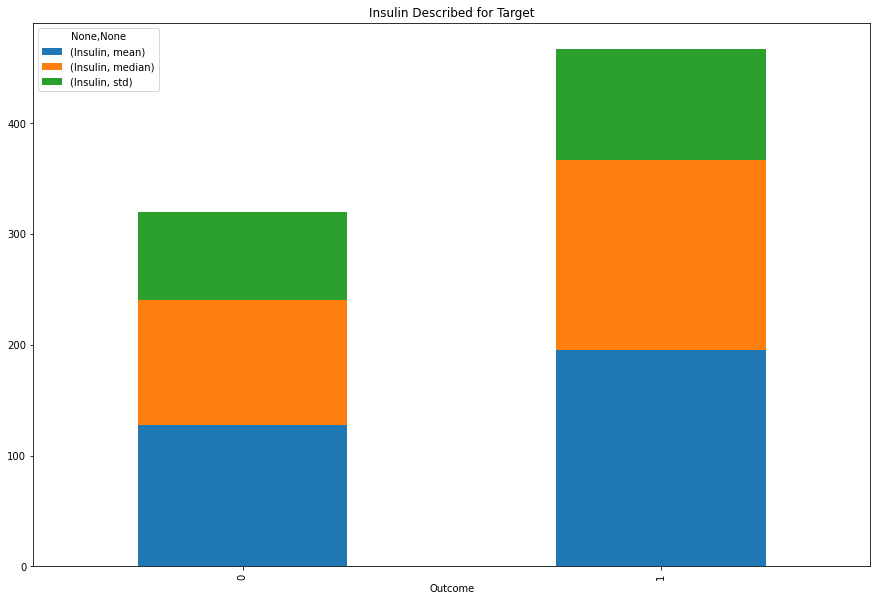

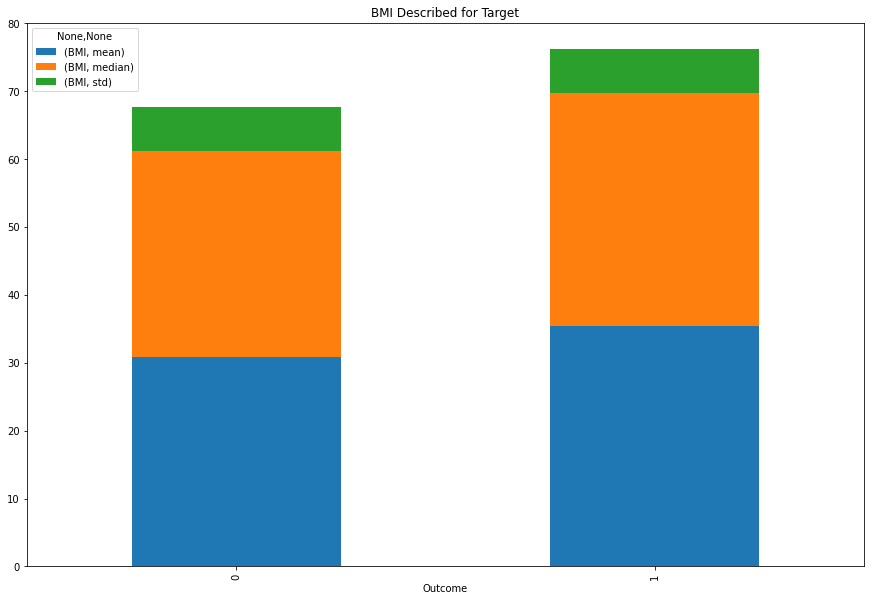

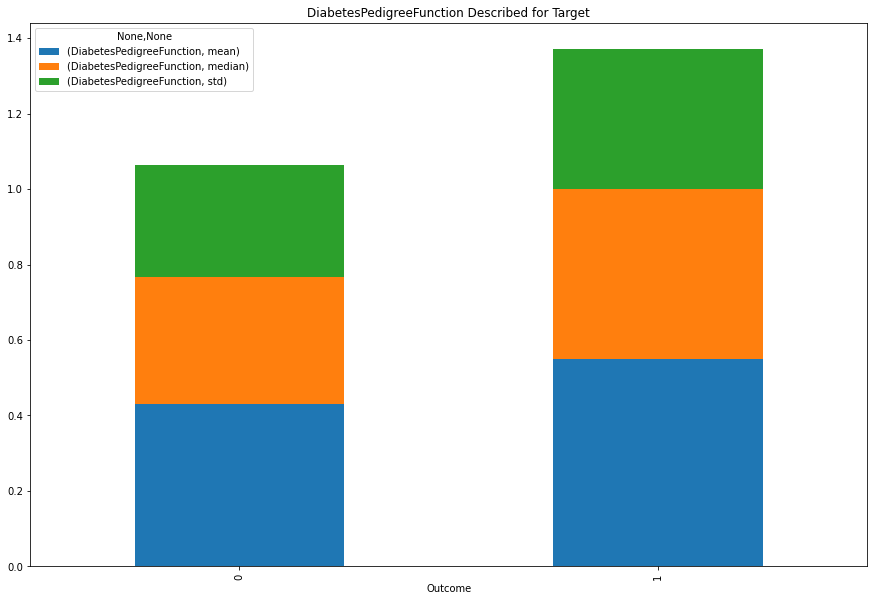

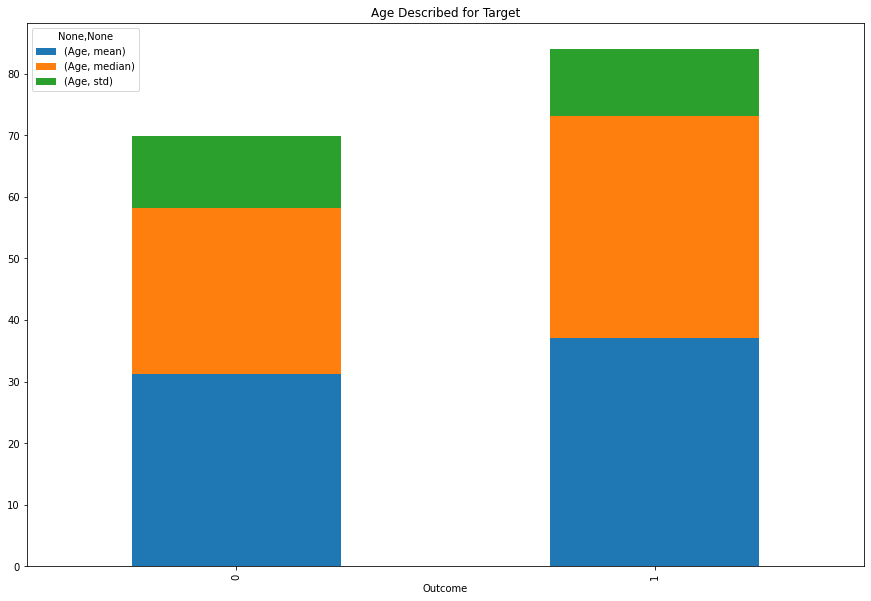

In [25]:
describe_for_target(df, columns=numeric_cols, target="Outcome")

For the analysis, 
* Variance is too high for diabetes
* Generaly variables are higher than health person.
* Especially pregnancy, insulin, BMI are clearly high for me.

## Analyze Correlation

In [26]:
from feature_utils import get_correlation

2023-03-12 04:10:09,906 - logging_utils - DEBUG - get_correlation executing...
2023-03-12 04:10:09,919 - logging_utils - INFO - 
                          Pregnancies   Glucose  ...       Age   Outcome
Pregnancies                  1.000000  0.128286  ...  0.544341  0.221898
Glucose                      0.128286  1.000000  ...  0.266925  0.493554
BloodPressure                0.210268  0.231155  ...  0.329212  0.177767
SkinThickness                0.087643  0.246018  ...  0.124717  0.272429
Insulin                      0.058141  0.633429  ...  0.163308  0.345002
BMI                          0.022960  0.233925  ...  0.030177  0.313105
DiabetesPedigreeFunction    -0.033523  0.137515  ...  0.033561  0.173844
Age                          0.544341  0.266925  ...  1.000000  0.238356
Outcome                      0.221898  0.493554  ...  0.238356  1.000000

[9 rows x 9 columns]


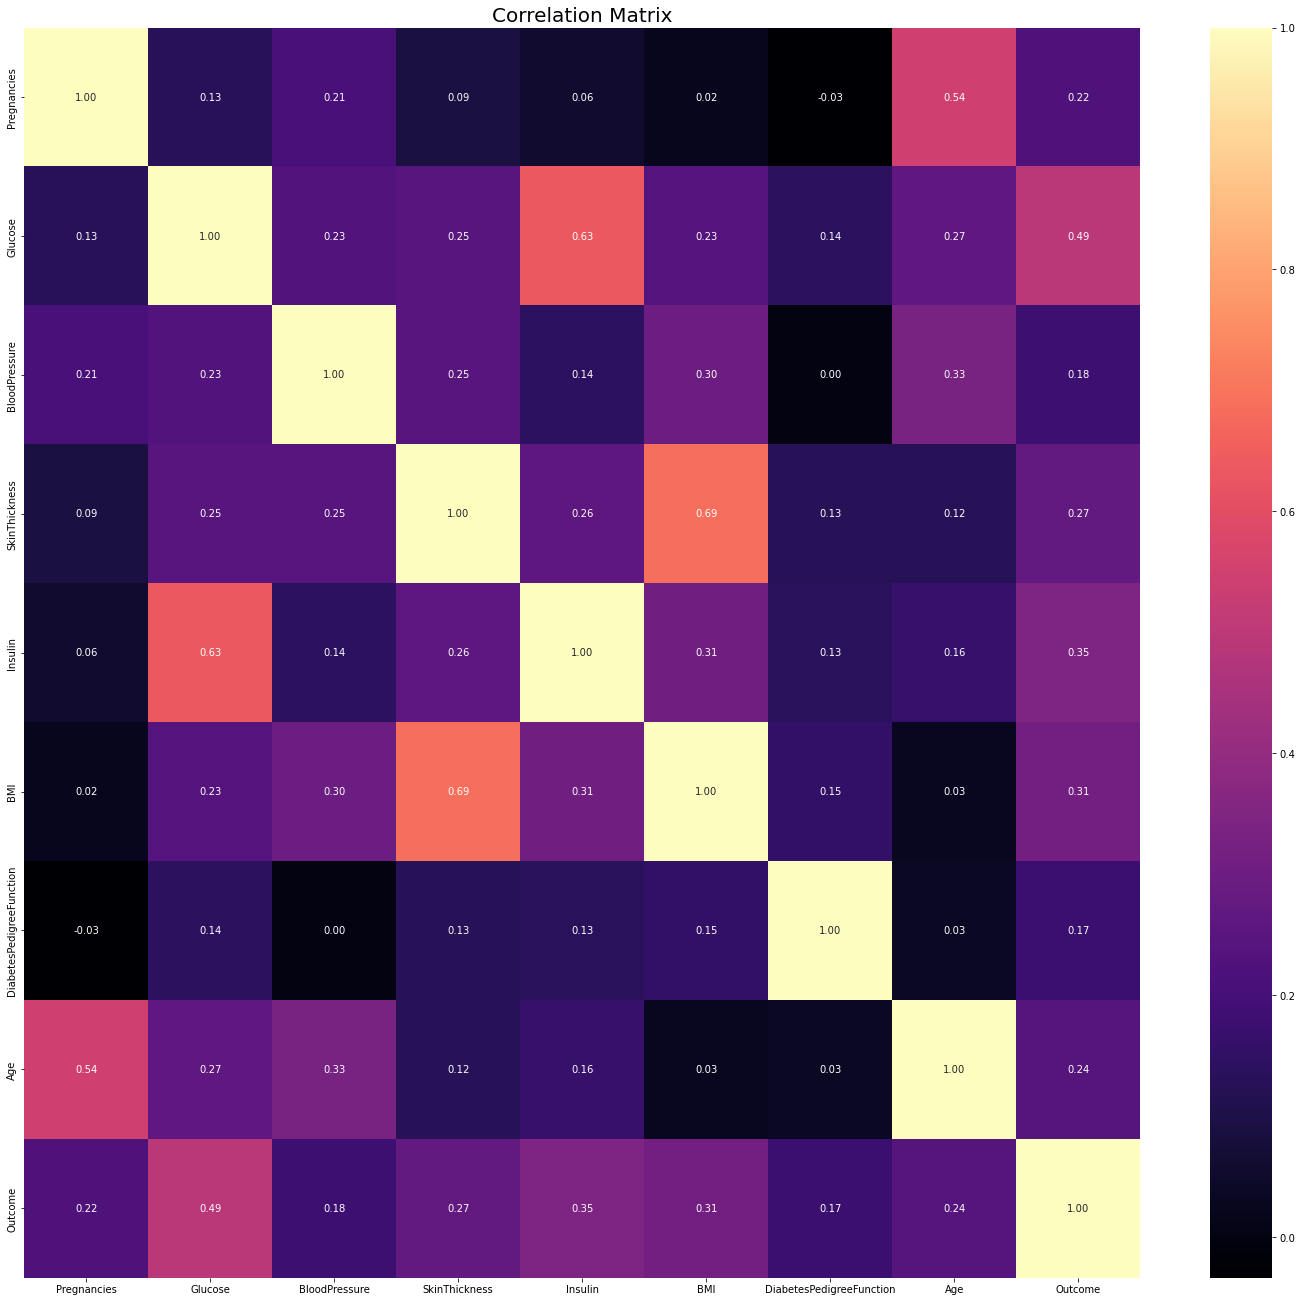

In [27]:
get_correlation(df, 1)

Continue with **feature extraction jupyter file**.